In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
t = np.arange(0, 12, 0.01)  # x array
y = np.sin(t)               # y array

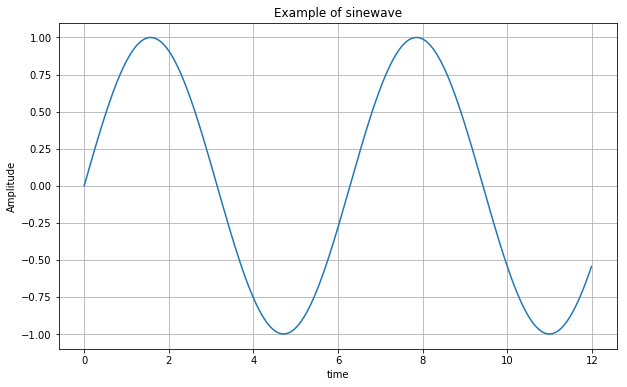

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(t, y)

plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

## 2장. 서울시 범죄현황 분석

In [57]:
%matplotlib inline

import pandas as pd
import numpy as np

In [67]:
crime_anal_police = pd.read_csv('DataScience-master/data/02. crime_in_Seoul.csv',
                               thousands=',', encoding='cp949')
print(crime_anal_police.shape)
crime_anal_police.head()

(31, 11)


,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861


In [68]:
station_addreess = [
    '대한민국 서울특별시 중구 을지로동 수표로 27',
    '대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46',
    '대한민국 서울특별시 중구 남대문로5가 한강대로 410',
    '대한민국 서울특별시 서대문구 미근동 통일로 113',
    '대한민국 서울특별시 종로구 종로1.2.3.4가동 창경궁로 112-16',
    '대한민국 서울특별시 용산구 원효로1가 25',
    '대한민국 서울특별시 성북구 삼선동5가 301',
    '대한민국 서울특별시 동대문구 청량리동 약령시로21길 29',
    '대한민국 서울특별시 마포구 아현동 618-1',
    '대한민국 서울특별시 영등포구 당산동3가 2-11',
    '대한민국 서울특별시 성동구 행당1동 왕십리광장로 9',
    '대한민국 서울특별시 동작구 노량진동 72',
    '대한민국 서울특별시 광진구 구의1동 자양로 167',
    '대한민국 서울특별시 은평구 대조동 통일로 757',
    '대한민국 서울특별시 강북구 번1동 415-15',
    '대한민국 서울특별시 관악구 신림동 544',
    '대한민국 서울특별시 중랑구 신내1동 신내역로3길 40-10',
    '대한민국 서울특별시 강남구 대치동 998',
    '대한민국 서울특별시 관악구 봉천동',
    '대한민국 서울특별시 양천구 신월동 화곡로 73',
    '대한민국 서울특별시 강동구 성내1동 성내로 57',
    '대한민국 서울특별시 성북구 종암동 종암로 135',
    '대한민국 서울특별시 구로구 가마산로 235',
    '대한민국 서울특별시 서초구 서초3동 반포대로 179',
    '대한민국 서울특별시 양천구 신정6동 목동동로 99',
    '대한민국 서울특별시 송파구 가락본동 9',
    '대한민국 서울특별시 노원구 하계동 노원로 283',
    '대한민국 서울특별시 서초구 방배2동 방배천로 54',
    '대한민국 서울특별시 은평구 불광2동 연서로 365',
    '대한민국 서울특별시 도봉구 창4동 노해로 403',
    '대한민국 서울특별시 강남구 개포동 개포로 617',
]

station_lat = [
    37.5636465,
    37.5755578,
    37.5547584,
    37.5647848,
    37.5718401,
    37.538649,
    37.5897271,
    37.58506149999999,
    37.550814,
    37.5257884,
    37.5617309,
    37.5130685,
    37.542873,
    37.6128611,
    37.6373881,
    37.4814051,
    37.618692,
    37.5094352,
    37.4743789,
    37.5397827,
    37.528511,
    37.6020592,
    37.494931,
    37.4956054,
    37.5165667,
    37.5019065,
    37.6423605,
    37.4815453,
    37.6283597,
    37.6533589,
    37.49349,
]

station_lng = [
    126.9895796,
    126.9848674,
    126.9734981,
    126.9667762,
    126.9988562,
    126.966055,
    127.0161318,
    127.0457679,
    126.954028,
    126.901006,
    127.0363806,
    126.9428078,
    127.083821,
    126.9274951,
    127.0273238,
    126.9099508,
    127.1047136,
    127.0669578,
    126.9509748,
    126.8299968,
    127.1268224,
    127.0321577,
    126.886731,
    127.0052504,
    126.8656763,
    127.1271513,
    127.0714027,
    126.9829992,
    126.9287226,
    127.052682,
    127.0772119,
]

In [72]:
station_name = []

for name in crime_anal_police.관서명:
    station_name.append('서울' + name[:-1] + '경찰서')
    
station_name

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

In [75]:
"helll,world".split(",")

['helll', 'world']

In [76]:
"""hello world hello python    hello      

ruby
javascript

django""".split()

['hello', 'world', 'hello', 'python', 'hello', 'ruby', 'javascript', 'django']

In [82]:
import re

gu_name = []

for address in station_addreess:
    matched = re.search(r'[ㄱ-힣]+구', address)
    gu_name.append(matched.group())

gu_name

['중구',
 '종로구',
 '중구',
 '서대문구',
 '종로구',
 '용산구',
 '성북구',
 '동대문구',
 '마포구',
 '영등포구',
 '성동구',
 '동작구',
 '광진구',
 '은평구',
 '강북구',
 '관악구',
 '중랑구',
 '강남구',
 '관악구',
 '양천구',
 '강동구',
 '성북구',
 '구로구',
 '서초구',
 '양천구',
 '송파구',
 '노원구',
 '서초구',
 '은평구',
 '도봉구',
 '강남구']

In [85]:
crime_anal_police['구별'] = gu_name
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구
